# Name : ABHISHEK V RAI

> Indented block


    

                                      
 # GRIP @ The Sparks Foundation


# TASK 3 :  Prediction using Decision Tree Algorithm 
                     (Level - Intermediate)


Task Description :

● Create the Decision Tree classiﬁer and visualize it graphically.

● The purpose is if we feed any new data to this  classiﬁer, it would be able to predict the right class accordingly 
<img src = img\1.png >

In [ ]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

STEP 1 - Dataset reading

In [ ]:
iris = load_iris()
X=iris.data[:,:] 
y=iris.target
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

data.head(10)


,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


STEP 2 - Data Visualization 

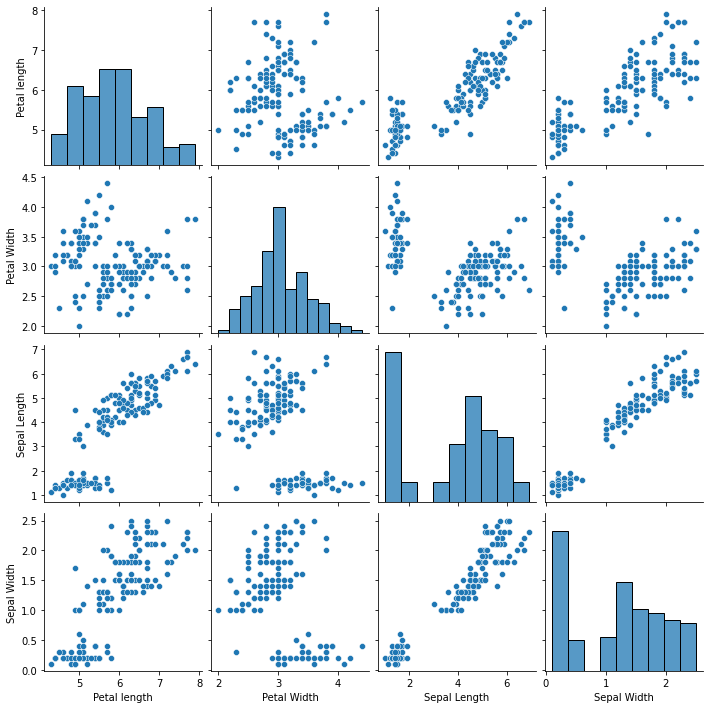

In [ ]:
sns.pairplot(data)

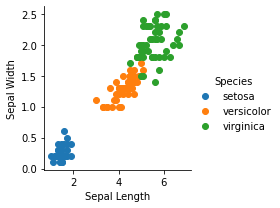

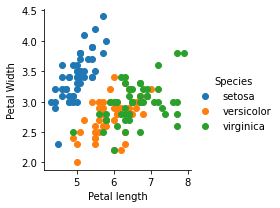

In [ ]:
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()
plt.show()

STEP 3 - Decision Tree Modelling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Model Training Completed.")

Model Training Completed.


 Step 4 - Comparing the actual and predicted value of the classification

In [ ]:
y_pred = tree_classifier.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df 

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


Step 5 - Visualizing the Trained Model

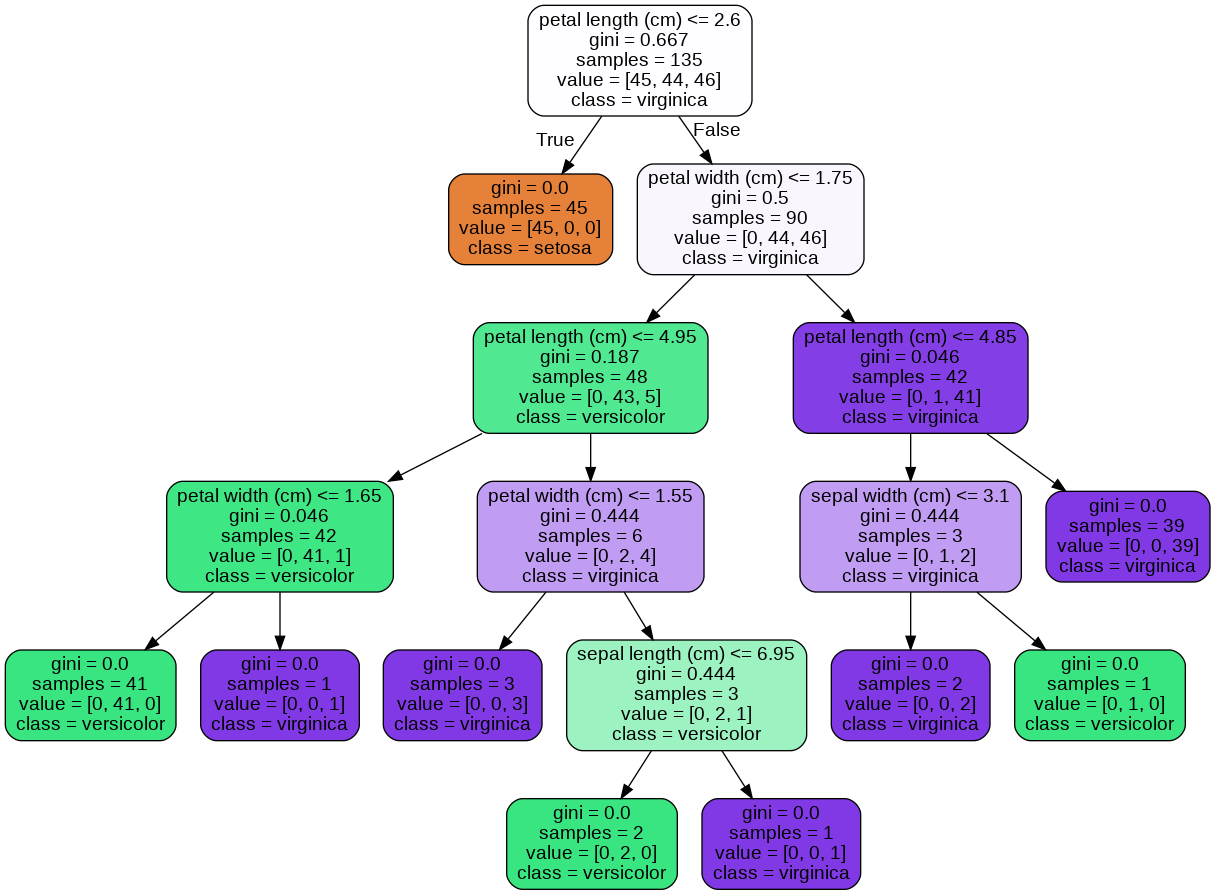

In [ ]:
export_graphviz(
        tree_classifier,
        out_file="img\desision_tree.dot",
        feature_names=iris.feature_names[:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
)

(graph,) = pydot.graph_from_dot_file('img\desision_tree.dot')
graph.write_png('img\desision_tree.png')

Image(filename='img\desision_tree.png') 

 Step 6 - Predicting the class output for given random values

In [ ]:
print("Class Names = ",iris.target_names)
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.5cm and 3.4cm and sepal length and width are 1.5cm and 0.3cm. ")
print()
print('Output = ',tree_classifier.predict([[4.5, 3.4, 1.5, 0.3]]))
print()
print("Model predicted class as:setosa.")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 4.5cm and 3.4cm and sepal length and width are 1.5cm and 0.3cm. 

Output =  [0]

Model predicted class as:setosa.


 Step 7 - Calculating the Model accuracy

In [ ]:
# Model Accuracy
print("Accuracy:",sm.accuracy_score(y_test, y_pred)*100)

Accuracy: 100.0


model accuracy is 100% as i have considered all the features for prediction

Confusion matrix 

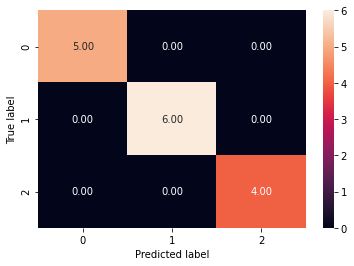

In [ ]:
 def draw_cm( actual, predicted ): 
    cm = sm.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

get_ipython().run_line_magic('matplotlib', 'inline') 
draw_cm(y_test, y_pred)

# CONCLUSION

Constructed Decision Tree classiﬁer and visualized it graphically.